Reading from csv file

In [1]:
import pandas as pn
data=pn.read_csv("./Data/fish.csv")


Transforming data to numpy

In [2]:
import numpy as np
data=np.asarray(data)


Extracting the features(x and y co-ordinates in this case) from data

In [3]:
X=data[:,:data.shape[1]-1]
#print(X)


Extracting the Label (Type/Class)

In [4]:
y=data[:,-1:]
#print(y)

Plotting in graph and taking test point - Decision boundery is the line where +1/-1 changes values

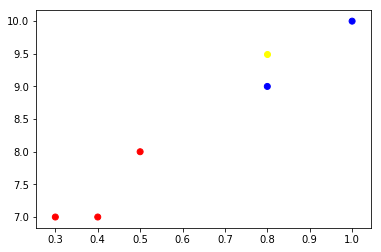

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

#Random point for testing purpose
test_X=np.array([[0.8,9.5]])


# Yellow = test, Blue = 1, Red = -1
color=['blue' if c == 1 else 'red' for c in y]
plt.scatter(X[:,:1],X[:,1:],c=color)
plt.scatter(test_X[:,:1],test_X[:,1:], color = 'yellow')

Helper fuctions for sorting

In [7]:
def cmp_to_key(mycmp):
    'Convert a cmp= function into a key= function'
    class K(object):
        def __init__(self, obj, *args):
            self.obj = obj
        def __lt__(self, other):
            return mycmp(self.obj, other.obj) < 0
        def __gt__(self, other):
            return mycmp(self.obj, other.obj) > 0
        def __eq__(self, other):
            return mycmp(self.obj, other.obj) == 0
        def __le__(self, other):
            return mycmp(self.obj, other.obj) <= 0  
        def __ge__(self, other):
            return mycmp(self.obj, other.obj) >= 0
        def __ne__(self, other):
            return mycmp(self.obj, other.obj) != 0
    return K

def greater(a,b):
        if (a[1] > b[1]):
            return 1
        return -1

KNN function

In [8]:
import math
def KNN(X,y,test,k):
    Dis = []
    X.shape
    for i in range (0, X.shape[0]):
        distance = ((X[i,0] - test[0,0]) ** 2) + ((X[i,1] - test[0,1])*(X[i,1] - test[0,1]))
        distance = math.sqrt(distance)
        Dis.insert(i, [y[i,0], distance])
 

    Dis.sort(key = cmp_to_key(greater))
    #print(Dis)
    
    cnt = 0;
    for i in range (0, k):
        if (Dis[i][0] == 1):
            cnt = cnt + 1

    if(cnt >= (k/2)):
        return 1;
    
    return -1


KNN(X,y,test_X,3)

1